# Project Python Foundations: FoodHub Data Analysis


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

- order_id: Unique ID of the order
- customer_id: ID of the customer who ordered the food
- restaurant_name: Name of the restaurant
- cuisine_type: Cuisine ordered by the customer
- cost_of_the_order: Cost of the order
- day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
- rating: Rating given by the customer out of 5
- food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
- delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information


### Let us start by importing the required libraries


In [228]:
# Installing the libraries with the specified version.

%pip install numpy==2.0.2 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2

Note: you may need to restart the kernel to use updated packages.


**Note**:

- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in **_this notebook_**.


In [229]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data


In [230]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [231]:

df = pd.read_csv("data/foodhub_order.csv")

In [232]:
# Write your code here to view the first 5 rows
print("=== First 5 ===\n\n",df.head(5))

=== First 5 ===

    order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24  


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]


In [233]:
# Write your code here
print("Number of (rows, columns):", df.shape)

Number of (rows, columns): (1898, 9)


#### Observations:

The number of rows and columns is 1898, 9.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]


In [234]:
# Write your code here
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


#### Observations:

There is one float column, and the rest of the columns are int and object.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]


In [235]:

# count missing values
# count missing values
df.isnull().sum()
df.isna().sum()
# there are no missing values


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

There are no missing values. No null or na.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]


In [236]:
# Write your code here
print("=== Food Preperation Time Stats ===\n\n")
print("Min: ", df['food_preparation_time'].min())
print("Avg: ", df['food_preparation_time'].mean())
print("Max: ", df['food_preparation_time'].max())






=== Food Preperation Time Stats ===


Min:  20
Avg:  27.371970495258168
Max:  35


#### Observations:

There are no major outliers of times.


### **Question 5:** How many orders are not rated? [1 mark]


In [237]:
# Write the code here
print("Orders that have a rating equal to 'Not given': ", df['rating'].where(cond=df['rating'] == 'Not given').count())

Orders that have a rating equal to 'Not given':  736


#### Observations:

About 1/3 of orders do not have ratings.


### Exploratory Data Analysis (EDA)


### Univariate Analysis


### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]


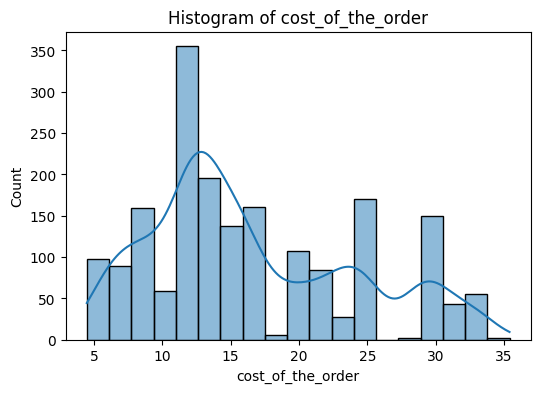

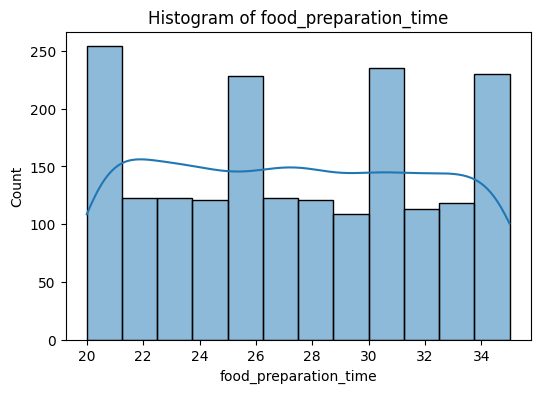

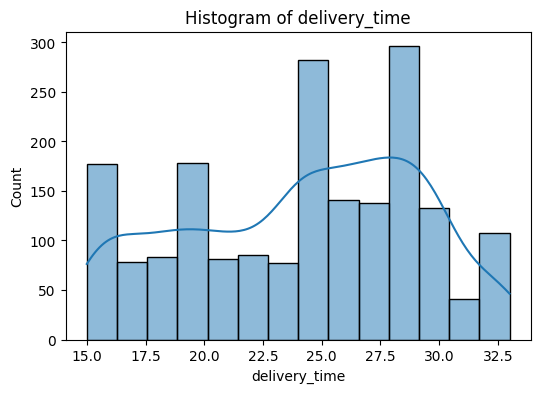

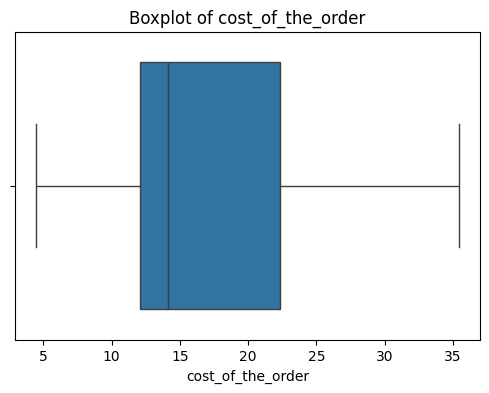

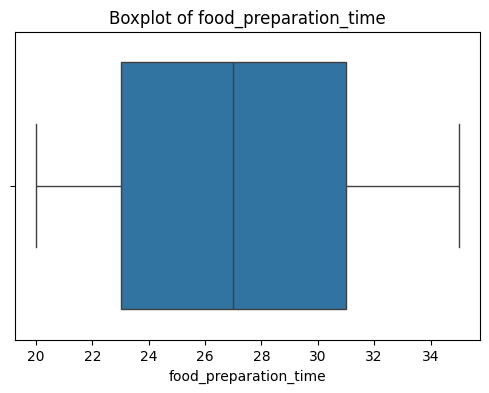

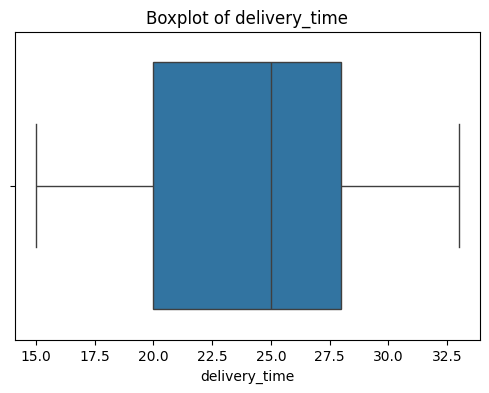

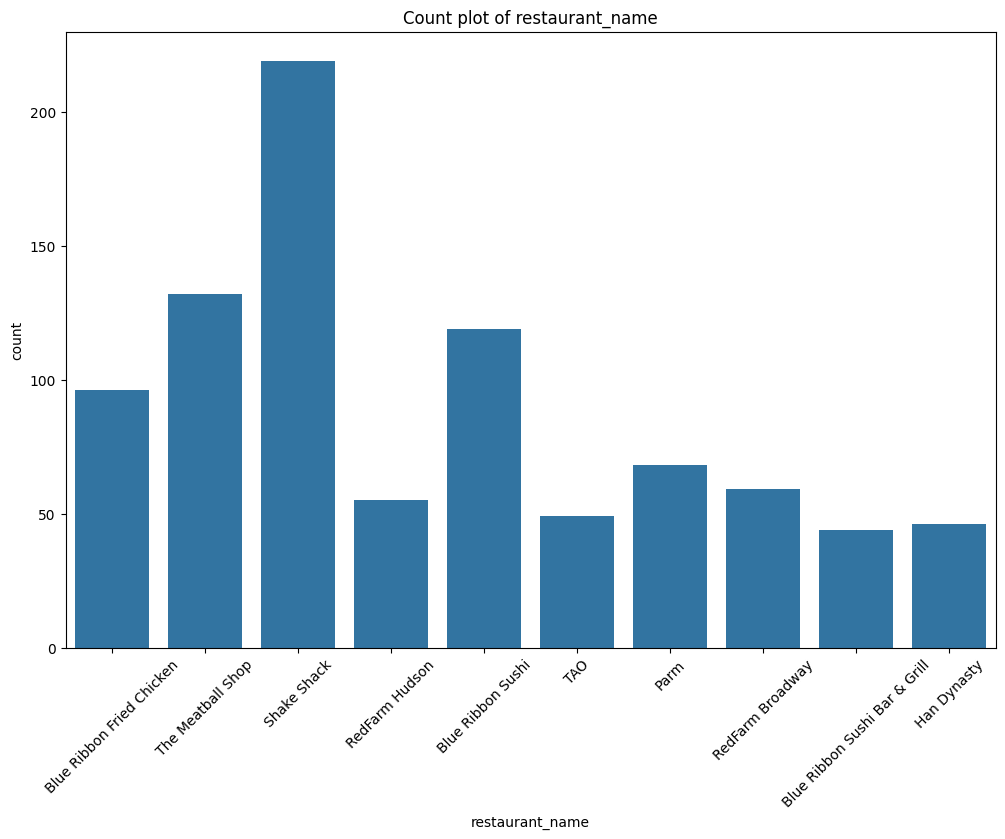

<Figure size 1000x600 with 0 Axes>

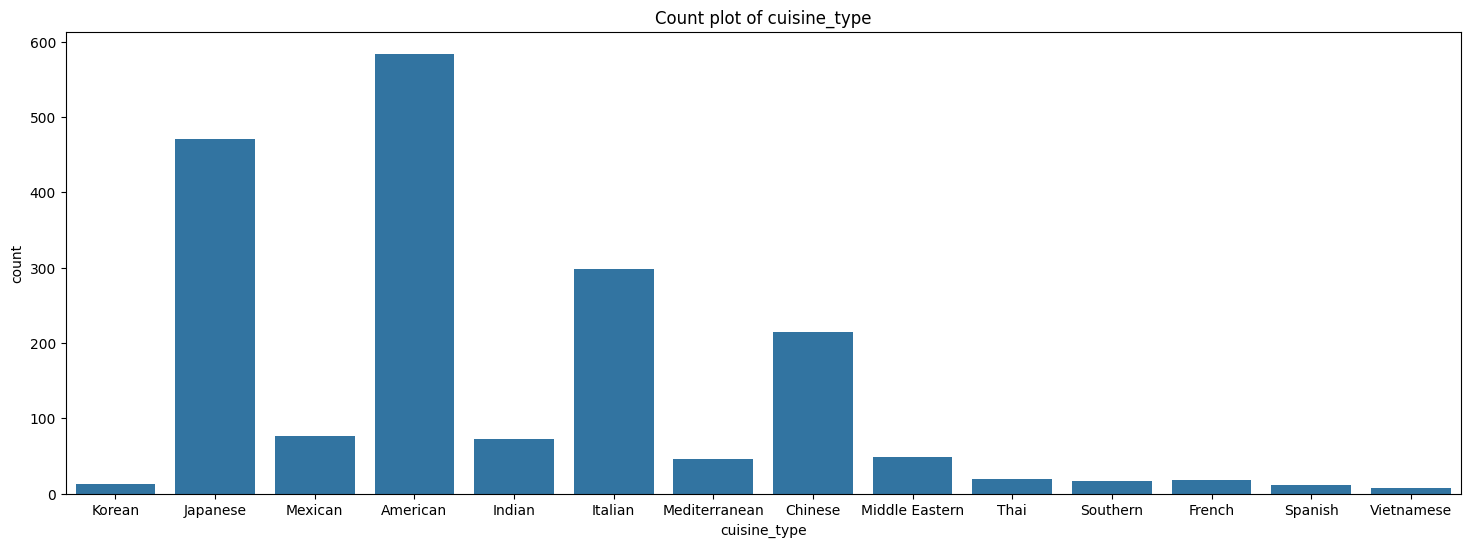

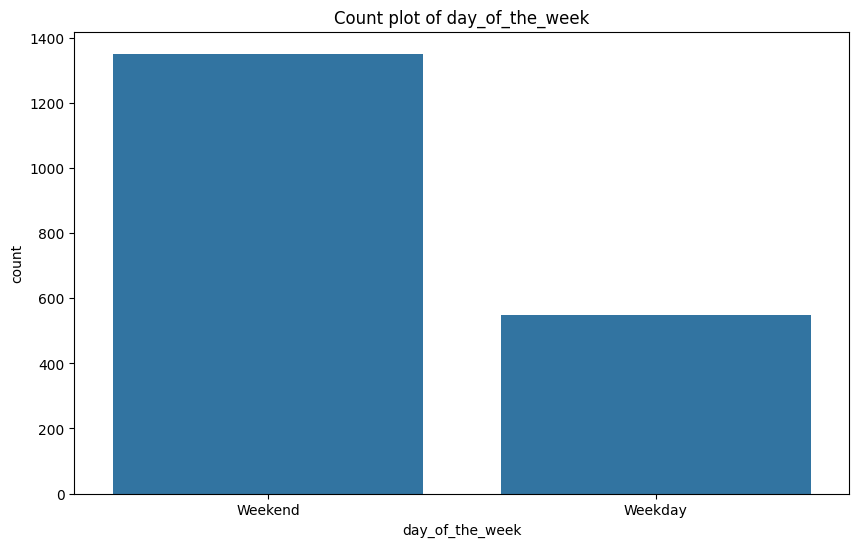

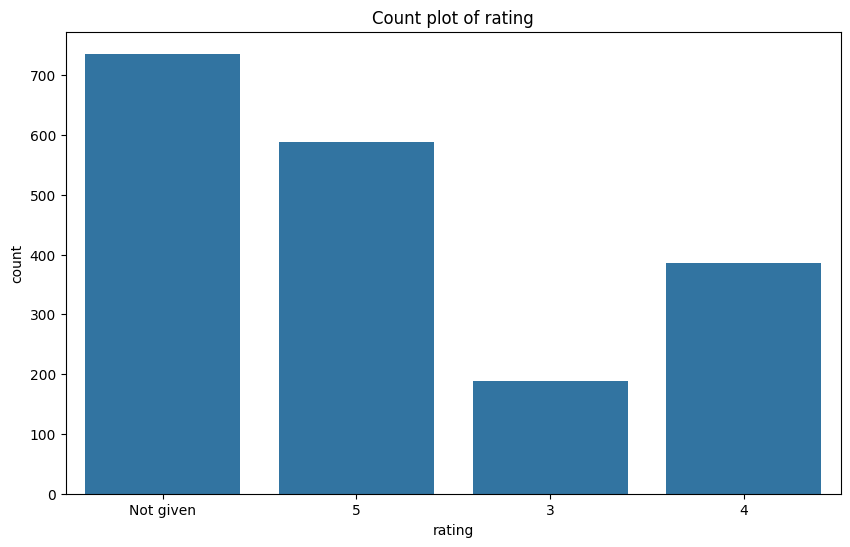

In [238]:
# Write the code here

# Numerical variables are: cost_of_the_order, food_preperation_time, delivery_time
# For these we will use a numerical historgram and numerical boxplots



numerical_cols = ["cost_of_the_order", "food_preparation_time", "delivery_time"]

# histograms
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

# boxplots
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

# for categorial variables I will use a count plot
categorical_cols = ["cuisine_type","day_of_the_week","rating"]

# restauant name plot... Many resturaunts so we need to filter it. This gets the top 10 most popular restaraunts. 
top_res = df['restaurant_name'].value_counts().nlargest(10).index
plt.figure(figsize=(12,8))
sns.countplot(data=df[df['restaurant_name'].isin(top_res)], x="restaurant_name")
plt.xticks(rotation=45)
plt.title(f'Count plot of restaurant_name')
plt.show()

for col in categorical_cols:
    plt.figure(figsize=(10,6))
    # need an extra wide plot for cuisine type
    if col == "cuisine_type":
        plt.figure(figsize=(18,6))
    sns.countplot(data=df, x = col)
    plt.title(f'Count plot of {col}')
    plt.show()




### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]


In [239]:
# Write the code here
# each entry is an order so we just need to find the 5 most commopn number of rows by restaurant name
print("=== Top 5 Restaruants === \n\n", df['restaurant_name'].value_counts().nlargest(5))


=== Top 5 Restaruants === 

 restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:

- Weekday deliveries take much longer than weekend deliveries. Likely due to traffic.
- American, Japanese, Italian, and Chinese are ordered a majority.
- Shake shack has by far the most orders.
- Customers seem most comfortable spending about $13.5 of food.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]


In [240]:
# Write the code here

# first we filter to get orders that were ordered on the weekend, then we use the nlargest method to get the largest value.
print("=== Most popular cusine on weekends: ===\n\n", df['cuisine_type'].where(cond=df['day_of_the_week'] == 'Weekend').value_counts().nlargest(1))


=== Most popular cusine on weekends: ===

 cuisine_type
American    415
Name: count, dtype: int64


#### Observations:

- The most popular cuisine is American. On weekends it is also the most popular.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]


In [241]:
# Write the code here
# get the total number of orders and get the count of the orders that cost more than 20
num_orders = len(df)

nums_order_greater_than_20 = len(df[df['cost_of_the_order'] > 20])
print("=== Number of Orders More Than $20 ===\n\n\n", nums_order_greater_than_20/num_orders*100, "%")


=== Number of Orders More Than $20 ===


 29.24130663856691 %


#### Observations:

- Surpirsingly few orders cost more than $20.


### **Question 10**: What is the mean order delivery time? [1 mark]


In [242]:
# Use the mean method
print("=== Mean Delivery Time ===\n\n", df['delivery_time'].mean(), "(minutes)")


=== Mean Delivery Time ===

 24.161749209694417 (minutes)


#### Observations:

- The mean delivery time is about 24 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]


In [243]:
# Get counts of num rows for each customer id
print("=== Discount Earners: ===\n\n",df['customer_id'].value_counts().head(3))

=== Discount Earners: ===

 customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:

- Top customers used around 10 deliveries in this time period.


### Multivariate Analysis


### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]



=== Mean Delivery Time by Cuisine Type ===
American: 24.193493150684933 minutes
Chinese: 23.855813953488372 minutes
French: 25.333333333333332 minutes
Indian: 24.08219178082192 minutes
Italian: 24.56711409395973 minutes
Japanese: 24.131914893617022 minutes
Korean: 20.923076923076923 minutes
Mediterranean: 23.58695652173913 minutes
Mexican: 24.38961038961039 minutes
Middle Eastern: 24.081632653061224 minutes
Southern: 23.823529411764707 minutes
Spanish: 23.416666666666668 minutes
Thai: 23.157894736842106 minutes
Vietnamese: 26.142857142857142 minutes

=== Mean Delivery Time by Day of Week ===
Weekday: 28.340036563071298 minutes
Weekend: 22.4700222057735 minutes

=== Mean Rating for Each Cuisine ===
Spanish: 4.833333333333333
Thai: 4.666666666666667
Indian: 4.54
Mexican: 4.416666666666667
Japanese: 4.373626373626373
Italian: 4.3604651162790695
Chinese: 4.338345864661654
Southern: 4.3076923076923075
French: 4.3
American: 4.298913043478261
Middle Eastern: 4.235294117647059
Mediterranean: 

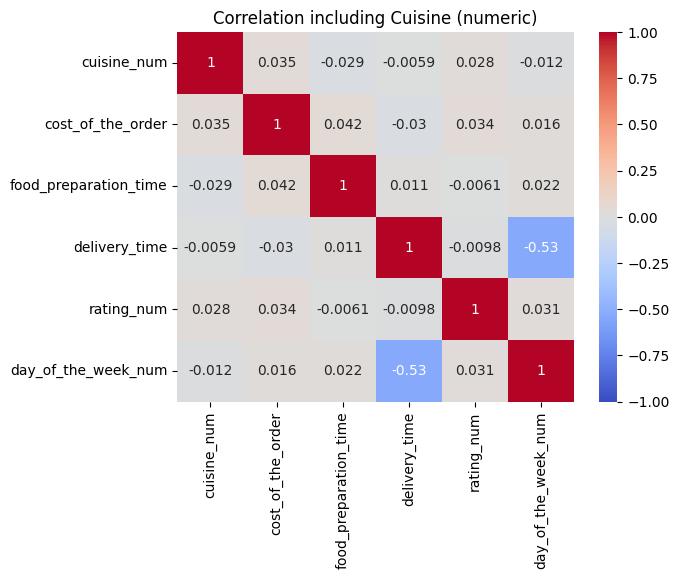

In [244]:
# --- DELIVERY TIME BY CUISINE ---
print("\n=== Mean Delivery Time by Cuisine Type ===")
for c, v in df.groupby('cuisine_type')['delivery_time'].mean().items():
    print(f"{c}: {v} minutes")


# --- DELIVERY TIME BY DAY ---
print("\n=== Mean Delivery Time by Day of Week ===")
for d, v in df.groupby('day_of_the_week')['delivery_time'].mean().items():
    print(f"{d}: {v} minutes")

df['rating_num'] = pd.to_numeric(df['rating'], errors='coerce') 

mean_ratings = df.groupby('cuisine_type')['rating_num'].mean().sort_values(ascending=False)

print("\n=== Mean Rating for Each Cuisine ===")
for c, v in mean_ratings.items():
    print(f"{c}: {v}")

print("\n=== Top 5 Highest Rated Cuisines ===")
print(mean_ratings.head(5))


# --- RATIO OF ORDERS PER RESTAURANT (REVENUE OPPORTUNITY) ---
restaurants_per_cuisine = df.groupby('cuisine_type')['restaurant_name'].nunique()
orders_per_cuisine = df.groupby('cuisine_type')['order_id'].count()
ratio = (orders_per_cuisine / restaurants_per_cuisine).sort_values(ascending=False)

print("\n=== Orders per Restaurant (Revenue Opportunity Index) ===")
for c, v in ratio.items():
    print(f"{c}: {v} orders per restaurant")

df['cuisine_num'] = df['cuisine_type'].astype('category').cat.codes
df['day_of_the_week_num'] = np.where(df['day_of_the_week'] == 'Weekend', 1, 0)
# Now compute correlation 
corr = df[['cuisine_num','cost_of_the_order','food_preparation_time','delivery_time','rating_num', 'day_of_the_week_num']].corr() 
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1) 
plt.title('Correlation including Cuisine (numeric)') 
plt.show()


#### Observations:

- Korean food shows the fastest average delivery.
- Japanese, American, and Chinese cuisines have more orders per restaurant, indicating higher demand per location.
- Cuisines like Thai, Vietnamese, and Korean have fewer orders per restaurant, suggesting lower demand or more available supply than needed.
- Very little correlation between the variables.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]


In [245]:
# Write the code here
df['rating_num'] = pd.to_numeric(df['rating'], errors='coerce')

promo = (
    df.groupby('restaurant_name')
      .agg(
          rating_count=('rating_num','count'),
          avg_rating=('rating_num','mean')
      )
)

promo_eligible = promo[(promo['rating_count'] > 50) & (promo['avg_rating'] > 4)]
print("=== Promo Eligible List === \n\n",promo_eligible)


=== Promo Eligible List === 

                            rating_count  avg_rating
restaurant_name                                    
Blue Ribbon Fried Chicken            64    4.328125
Blue Ribbon Sushi                    73    4.219178
Shake Shack                         133    4.278195
The Meatball Shop                    84    4.511905


#### Observations:

- The highest average rating is only 4.5.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]


In [246]:
# Write the code here
def commission(cost):
    # cost is greater than 20 so apply percentage
    if cost > 20:
        return 0.25 * cost
    elif cost > 5:
        return 0.15 * cost
    # nothing specified for less than 5
    else:
        return 0
    
df['revenue'] = df['cost_of_the_order'].apply(commission)

# create a new column
rev = df['revenue'].sum()

print("Total revenue: $", float(rev),)


Total revenue: $ 6166.303


#### Observations:

- The revenue is quite low.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]


In [247]:
# Write the code here

# just simply filter with a where clause
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

percentage_over_60 = (df['total_time'] > 60).mean() * 100
print("Percentage of orders over 60 mins: ", percentage_over_60)


Percentage of orders over 60 mins:  10.537407797681771


#### Observations:

- A good percentage does not take over 60 minutes. They may want to lower it even more.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]


In [248]:
# Write the code here

# already did this above

print("=== Mean Delivery Time by Day of Week ===")
for day, value in df.groupby('day_of_the_week')['delivery_time'].mean().items():
    print(f"{day}: {value:.2f} minutes")


=== Mean Delivery Time by Day of Week ===
Weekday: 28.34 minutes
Weekend: 22.47 minutes


#### Observations:

- Weekend deliveries take shorter. Likely has to do with traffic.


### Conclusion and Recommendations


### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]


### Conclusions:

- The average delivery time is ~24 minutes, which indicates the delivery network is operating fairly efficiently.

- Spanish, Thai, and Indian cuisine have the highest average ratings.

- Delivery time has almost no correlation with customer rating, meaning customers don’t strongly punish slightly longer deliveries as long as food quality is good.

- Furthermore, all correlations are very close to zero, meaning ratings are not strongly influenced by cost, preparation time, or delivery time.

- American, Japanese, Italian, and Chinese cuisines are most ordered.

- Customers care most about food qulaity rather than anything else.


### Recommendations:

- Promote the Spanish, Thai, and Indian retaurants as they have the highest ratings.

- Try to get more American, Japanese, Italian, and Chinese in app as it will drive revenue due to them being most ordered.

- Customers care more about food quality than anything else, so the in-app restaurant description should focus on food quality.


---
